# Seq2Seq (Sequence to Sequence) 모델

- Seq2Seq(Sequence to Sequence) 모델은 입력 시퀀스를 받아 출력 시퀀스를 생성하는 모델입니다. 특히, 길이가 서로 다른 두 시퀀스를 처리할 수 있도록 설계되었으며, 기계 번역, 텍스트 요약, 챗봇 등의 다양한 분야에서 사용됩니다.

## 1. 등장 배경

- RNN(Recurrent Neural Network)은 시퀀스 데이터를 학습할 수 있지만, 고정된 길이의 입력과 출력만을 처리할 수 있는 한계가 있었습니다.
- Seq2Seq 모델은 이 한계를 극복하기 위해 등장했으며, **Encoder-Decoder 구조**를 통해 입력과 출력의 길이가 다른 시퀀스 데이터도 학습할 수 있습니다.
- 2014년 Google에서 처음 제안되었으며, 특히 기계 번역과 같은 자연어 처리(NLP) 작업에서 뛰어난 성능을 보입니다.

## 2. 사용 예시

- **기계 번역 (Machine Translation)**: 예를 들어 영어 문장을 프랑스어 문장으로 변환하는 작업에 사용됩니다.
- **텍스트 요약 (Text Summarization)**: 긴 텍스트를 짧은 요약문으로 압축하는 작업에 유용합니다.
- **질문 응답 시스템 (Question Answering)**: 질문을 입력으로 받고, 그에 대한 답변을 생성합니다.
- **챗봇 (Chatbot)**: 사용자의 발화(입력)에 따라 적절한 응답(출력)을 생성하는 대화 시스템에 적용됩니다.

 <img src="https://user-images.githubusercontent.com/68190553/121118577-0ebd6280-c855-11eb-8717-5a1b232331ee.gif">

## 3. Seq2Seq 모델의 작동 원리

- Seq2Seq 모델은 **인코더(Encoder)**와 **디코더(Decoder)**라는 두 개의 RNN으로 구성됩니다.

### 1.인코더 (Encoder)

- 인코더는 입력 시퀀스를 받아 **컨텍스트 벡터(Context Vector)**라는 고정 길이의 벡터로 변환합니다. 이 벡터는 입력 시퀀스의 의미를 요약한 정보로, 디코더가 참조하여 출력을 생성할 때 사용됩니다.

  1. 각 입력 시퀀스 $x = (x_1, x_2, \dots, x_T)$는 RNN 계층을 거쳐 인코더의 은닉 상태에 전달됩니다.
  2. 마지막 타임스텝에서 생성된 은닉 상태 $h_T$가 **컨텍스트 벡터**로, 디코더로 전달됩니다.

### 2.디코더 (Decoder)
- 디코더는 인코더로부터 전달받은 컨텍스트 벡터를 사용하여 출력 시퀀스를 생성합니다. 디코더는 RNN 구조로, 컨텍스트 벡터와 디코더의 이전 출력이 입력으로 사용됩니다.

  1. 컨텍스트 벡터와 디코더의 이전 출력 $y_{t-1}$을 받아 은닉 상태를 갱신합니다.
  2. 현재 은닉 상태를 기반으로 $y_t$라는 새로운 출력을 생성하며, 이는 다음 타임스텝의 입력이 됩니다

### 3.어텐션 메커니즘 (Attention Mechanism)
- 초기 Seq2Seq 모델은 긴 시퀀스를 처리하는 데 한계가 있었습니다. 이를 해결하기 위해 **어텐션 메커니즘**이 도입되었습니다. 어텐션 메커니즘은 디코더가 출력 시퀀스를 생성할 때, 인코더의 모든 은닉 상태를 참조하여, 필요한 정보에 집중(attend)할 수 있도록 합니다. 이를 통해 성능과 정확도가 크게 향상되었습니다.

## Seq2Seq 모델의 장단점

**장점**
- **유연성**: 입력과 출력 시퀀스의 길이가 달라도 처리할 수 있습니다.
- **다양한 응용 분야**: 자연어 처리에서 매우 다양한 작업에 사용할 수 있습니다.
- **어텐션을 통한 성능 개선**: 어텐션 메커니즘으로 긴 시퀀스에서도 정확한 출력을 생성할 수 있습니다.

**단점**
- **긴 시퀀스에서 성능 저하**: 어텐션이 없는 초기 Seq2Seq 모델은 긴 시퀀스에서 성능이 저하됩니다.
- **병렬 처리 어려움**: RNN 구조 특성상 병렬 처리가 어려워, 훈련 및 추론 속도가 느립니다.
- **고정 길이 컨텍스트 벡터의 한계**: 초기 Seq2Seq 모델은 인코더가 모든 입력 정보를 고정 길이 벡터로 요약해야 하므로, 긴 문장에서 정보 손실이 발생할 수 있습니다.


Seq2Seq 모델은 자연어 처리에서 핵심적인 모델로 자리잡고 있으며, 이후에 등장한 Transformer 모델의 기초가 되기도 했습니다. 특히, 어텐션 메커니즘의 도입으로 현재의 강력한 NLP 모델의 기반이 되었습니다.


<img src="https://cdn.pixabay.com/photo/2024/05/05/16/30/ai-generated-8741448_1280.jpg" width="500">

# 파이토치 Seq2Seq 구현

## 분석 환경 준비 및 설정

In [ ]:
# 한국어 분석을 위한 도구 설치
!pip install konlpy
# 네이버의 한글 폰트인 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum

In [ ]:
# 한글 폰트 사용을 위한 설정. 아래 명령어 실행 완료 후 런타임 다시 시작
!sudo apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
# 필요한 라이브러리 임포트
import os  # 운영체제와의 상호작용을 위한 라이브러리
import numpy as np  # 수치 데이터를 처리하기 위한 라이브러리
import pandas as pd  # 데이터 프레임 형태로 데이터를 다루기 위한 라이브러리
import random  # 무작위 숫자 생성을 위한 라이브러리
import re  # 정규 표현식을 사용해 문자열을 다루기 위한 라이브러리
import torch  # PyTorch를 사용해 신경망 모델을 만들기 위한 라이브러리
import urllib.request  # URL에서 파일을 다운로드 하기 위한 라이브러리
import torch.nn as nn  # 신경망 모델 생성을 위한 PyTorch 하위 모듈
import seaborn as sns # 데이터 시각화 라이브러리
import matplotlib.pyplot as plt # 데이터 시각화 라이브러리
import matplotlib.font_manager as fm # matplotlib 폰트 설정
from torch import optim  # 모델 학습을 위한 최적화 도구 제공
import torch.nn.functional as F  # 자주 사용되는 신경망 기능들 (예: 활성화 함수들)
from torch.utils.data.dataset import Dataset  # PyTorch에서 데이터셋을 정의하기 위한 모듈
from torch.utils.data import DataLoader, random_split, SubsetRandomSampler  # 데이터로더, 데이터셋 분할 및 샘플링을 위한 모듈
from konlpy.tag import Okt  # 한국어 형태소 분석을 위한 konlpy의 Okt 형태소 분석기
from wordcloud import WordCloud # 워드클라우드 생성을 위한 라이브러리

In [ ]:
# 설치된 한글 폰트를 찾아 폰트경로 설정
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
for font in font_list:
    if 'NanumGothicCoding' in font:
        fontpath = font
        break

# 폰트 파일 등록
fe = fm.FontEntry(fname=fontpath, name='NanumGothicCoding')
# 폰트 매니저에 폰트 추가
fm.fontManager.ttflist.insert(0, fe)
# Matplotlib의 기본 폰트 변경
plt.rcParams['font.family'] = fe.name

In [ ]:
# GPU/CPU 디바이스 설정
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")  # GPU 사용 가능 여부에 따라 디바이스 설정

# 데이터 로드
urllib.request.urlretrieve(
    "https://raw.githubusercontent.com/songys/Chatbot_data/master/ChatbotData.csv",
    filename="ChatBotData.csv",
)  # 챗봇 학습 데이터를 URL에서 다운로드

df = pd.read_csv("ChatBotData.csv")  # CSV 파일을 데이터프레임으로 로드

## 탐색적 데이터 분석(EDA) 진행

In [ ]:
# 1. 질문과 답변의 길이 확인
# 각 질문(Q)과 답변(A)의 길이를 계산하여 새로운 컬럼에 저장
df['Q_len'] = df['Q'].apply(len)
df['A_len'] = df['A'].apply(len)

# 질문과 답변의 평균 길이 확인
print("\n평균 질문 길이:", df['Q_len'].mean())
print("평균 답변 길이:", df['A_len'].mean())


평균 질문 길이: 12.879049310665652
평균 답변 길이: 15.0151399813922


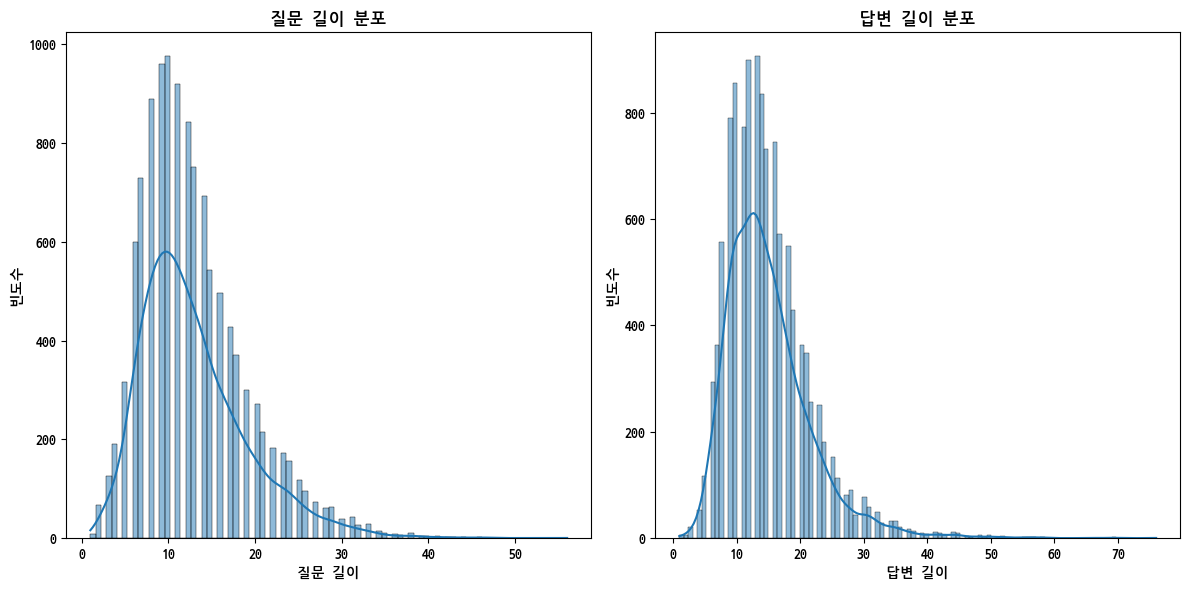

In [ ]:
# 2. 질문과 답변의 길이 분포 시각화
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Q_len'], kde=True)
plt.title("질문 길이 분포")
plt.xlabel("질문 길이")
plt.ylabel("빈도수")

plt.subplot(1, 2, 2)
sns.histplot(df['A_len'], kde=True)
plt.title("답변 길이 분포")
plt.xlabel("답변 길이")
plt.ylabel("빈도수")
plt.tight_layout()
plt.show()


가장 많이 등장한 단어 상위 10개:
[('거예요.', 1031), ('수', 647), ('너무', 638), ('더', 556), ('좋아하는', 538), ('거', 476), ('잘', 470), ('것', 428), ('많이', 405), ('안', 389)]


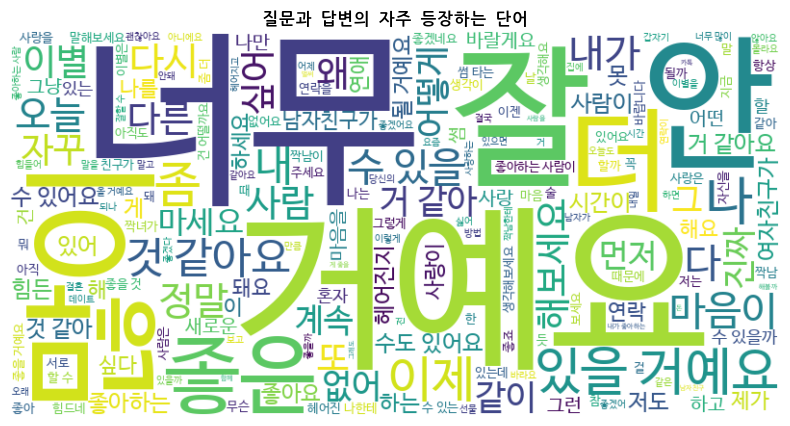

In [ ]:
# 3. 자주 등장하는 단어 분석
# 모든 질문과 답변을 연결하여 단어 빈도를 계산
from collections import Counter

# 질문과 답변 컬럼을 모두 결합한 문자열 생성
all_text = ' '.join(df['Q']) + ' ' + ' '.join(df['A'])

# 단어별 빈도 계산
word_counts = Counter(all_text.split())

# 가장 많이 등장한 상위 10개의 단어 출력
print("\n가장 많이 등장한 단어 상위 10개:")
print(word_counts.most_common(10))

# 워드클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='NanumBarunGothic').generate(all_text)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("질문과 답변의 자주 등장하는 단어")
plt.show()


질문 길이와 답변 길이 간의 상관관계: 0.22830716850599372


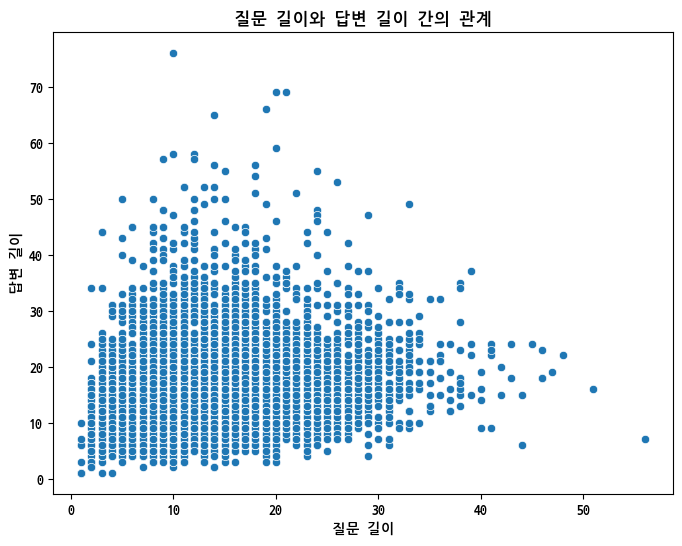

In [ ]:
# 4. 답변 길이에 따른 질문 길이의 상관관계 분석
# 질문 길이(Q_len)와 답변 길이(A_len) 간의 상관관계 확인
correlation = df['Q_len'].corr(df['A_len'])
print("\n질문 길이와 답변 길이 간의 상관관계:", correlation)

# 산점도를 통한 상관관계 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Q_len', y='A_len', data=df)
plt.title("질문 길이와 답변 길이 간의 관계")
plt.xlabel("질문 길이")
plt.ylabel("답변 길이")
plt.show()

In [ ]:
# 5. 데이터 내 결측치 확인
# 질문(Q)과 답변(A) 컬럼 내 결측치 개수 확인
missing_values = df[['Q', 'A']].isnull().sum()
print("\n결측치 개수:")
print(missing_values)


결측치 개수:
Q    0
A    0
dtype: int64


In [ ]:
# 6. 중복데이터 확인
df[df.duplicated(subset='Q', keep=False)].sort_values('Q')

,Q,A,label,Q_len,A_len
5316,2년 가량의 연애,안 좋은 기억보다 좋은 기억이 더 많았으면 좋겠네요.,1,9,29
8868,2년 가량의 연애,딱 잘 만났네요.,2,9,9
8901,가을 타나 봐.,외로운 옆구리를 채워보아요.,2,8,15
8902,가을 타나 봐.,혼자는 외로운 계절이죠.,2,8,13
5439,간단하게 사랑이라는건.,여러번 해도 어려워요.,1,12,12
...,...,...,...,...,...
5232,회사에는 왜 친구 같은 사람이 없을까,회사는 친구 사귀는 곳이 아니에요.,0,20,19
5246,후련하달까,후련하니 다행이에요.,0,5,11
8789,후련하달까,후련하니 다행이에요.,1,5,11
11818,훔쳐보는 것도 눈치 보임.,티가 나니까 눈치가 보이는 거죠!,2,14,18


In [ ]:
# 중복데이터 제거
df = df.drop_duplicates(subset='Q', keep='first')

In [ ]:
questions, answers = df['Q'], df['A']  # 질문과 답변을 각각 추출

## 전처리 함수 정의

In [ ]:
# 데이터 전처리를 위한 정규화 함수 정의
def normalize(sentence, pattern=r'[^ ?,.!A-Za-z0-9가-힣+]'):
    """
    입력된 문장에서 한글, 영어, 숫자, 공백, ?!., 을 제외한 나머지 문자를 제거합니다.

    예시:
    입력: "안녕하세요!! 반갑습니다^^ 오늘 기분이 어때요?"
    출력: "안녕하세요 반갑습니다 오늘 기분이 어때요"
    """
    normalizer = re.compile(pattern)  # 특정 패턴에 해당하는 문자들을 탐색하기 위한 정규 표현식 컴파일
    return normalizer.sub("", sentence)  # 정규 표현식을 사용하여 해당 문자들을 제거하고 반환

# 한글 형태소 분석기 설정
tagger = Okt()  # Okt 형태소 분석기 사용

def clean_text(sentence, tagger):
    """
    입력된 문장을 정규화하고 형태소 분석을 거친 후 공백으로 결합하여 반환합니다
    예시:
    입력: "안녕하세요 반갑습니다 오늘 기분이 어때요"
    1단계: 정규화 -> "안녕하세요 반갑습니다 오늘 기분이 어때요"
    2단계: 형태소 분석 및 소문자 변환 -> "안녕 하 세요 반갑 습니다 오늘 기분 이 어떠 하 세요"
    출력: "안녕 하 세요 반갑 습니다 오늘 기분 이 어떠 하 세요".
    """
    sentence = normalize(sentence)  # 문장 정규화
    sentence = ' '.join(tagger.morphs(sentence)).lower()  # 형태소 단위로 나누고 모든 문장을 소문자로 변환
    return sentence

# 전처리한 텍스트 데이터 준비
questions_clean = [clean_text(sent, tagger) for sent in questions.values[:2000]]  # 질문 데이터의 전처리
answers_clean = [clean_text(sent, tagger) for sent in answers.values[:2000]]  # 답변 데이터의 전처리

## 단어사전, 데이터 클래스 정의

In [ ]:
# 단어 사전 생성 클래스 정의
class WordVocab:
    def __init__(self):
        # 특수 토큰들로 단어 사전 초기화
        self.word2index = {'<PAD>': 0, '<SOS>': 1, '<EOS>': 2}
        self.index2word = {0: '<PAD>', 1: '<SOS>', 2: '<EOS>'}
        self.word2count = {}  # 단어의 빈도를 기록하기 위한 딕셔너리
        self.n_words = 3  # 특수 토큰의 개수

    def add_sentence(self, sentence):
        # 문장을 단어 단위로 분할하여 단어를 사전에 추가
        for word in sentence.split(' '):
            self.add_word(word)

    def add_word(self, word):
        if word not in self.word2index:
            # 단어를 처음 발견하면 사전에 추가
            self.word2index[word] = self.n_words
            self.index2word[self.n_words] = word
            self.word2count[word] = 1
            self.n_words += 1
        else:
            # 이미 있는 단어이면 빈도 카운트를 증가
            self.word2count[word] += 1

# 단어 사전 생성 및 전처리한 데이터 처리
word_vocab = WordVocab()
for sent in questions_clean + answers_clean:
    word_vocab.add_sentence(sent)  # 모든 질문과 답변에 대해 단어 사전을 구성

In [ ]:
# 데이터셋 클래스 정의
class TextDataset(Dataset):
    def __init__(self, questions, answers, word_vocab, tagger, max_length=32):
        super(TextDataset, self).__init__()
        self.questions = questions  # 질문 데이터
        self.answers = answers  # 답변 데이터
        self.word_vocab = word_vocab  # 단어 사전
        self.tagger = tagger  # 형태소 분석기
        self.max_length = max_length  # 최대 시퀀스 길이

    def texts_to_sequences(self, sentence):
        # 주어진 문장을 단어 인덱스 시퀀스로 변환
        return [self.word_vocab.word2index.get(word, 0) for word in sentence.split()]

    def pad_sequence(self, tokens):
        # 주어진 시퀀스를 <PAD> 토큰으로 최대 길이만큼 패딩
        tokens = tokens[:self.max_length-1]  # 최대 길이를 초과하면 잘라냄
        tokens.append(2)  # <EOS> 토큰 추가
        return tokens + [0] * (self.max_length - len(tokens))  # <PAD> 토큰으로 길이 맞춤

    def __getitem__(self, idx):
        # 인덱스를 받아 질문과 답변을 토큰 시퀀스로 변환하고 텐서로 반환
        q_tokens = self.texts_to_sequences(self.questions[idx])
        a_tokens = self.texts_to_sequences(self.answers[idx])
        return torch.tensor(self.pad_sequence(q_tokens)), torch.tensor(self.pad_sequence(a_tokens))

    def __len__(self):
        # 데이터셋의 전체 길이를 반환
        return len(self.questions)

# 데이터셋 객체 생성 및 데이터 분할
dataset = TextDataset(questions_clean, answers_clean, word_vocab, tagger)
train_size = int(len(dataset) * 0.8)  # 전체 데이터의 80%를 훈련 데이터로 사용
test_size = len(dataset) - train_size  # 나머지 20%를 테스트 데이터로 사용
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])  # 훈련/테스트 데이터 분할

In [ ]:
# DataLoader 생성
BATCH_SIZE = 16  # 배치 크기 설정
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)  # 훈련 데이터 로더 생성
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)  # 테스트 데이터 로더 생성

## 모델링

In [ ]:
# Encoder 클래스 정의
class Encoder(nn.Module):
    def __init__(self, num_vocabs, embedding_dim, hidden_size, num_layers=1):
        super(Encoder, self).__init__()
        self.embedding = nn.Embedding(num_vocabs, embedding_dim)  # 단어 임베딩 층
        self.gru = nn.GRU(embedding_dim, hidden_size, num_layers=num_layers, bidirectional=False)  # GRU 레이어 정의

    def forward(self, x):
        x = self.embedding(x).permute(1, 0, 2)  # 임베딩 후 차원 변경: (batch_size, seq_length) -> (seq_length, batch_size, embedding_dim)
        output, hidden = self.gru(x)  # 인코더의 출력은 출력 벡터와 히든 상태 벡터
        return output, hidden

# Decoder 클래스 정의
class Decoder(nn.Module):
    def __init__(self, num_vocabs, embedding_dim, hidden_size, num_layers=1, dropout=0.2):
        super(Decoder, self).__init__()
        self.num_vocabs = num_vocabs  # 단어 사전 크기
        self.embedding = nn.Embedding(num_vocabs, embedding_dim)  # 단어 임베딩 층
        self.gru = nn.GRU(embedding_dim, hidden_size, num_layers=num_layers, bidirectional=False)  # GRU 레이어 정의
        self.fc = nn.Linear(hidden_size, num_vocabs)  # 히든 상태를 단어 사전 크기로 변환
        self.dropout = nn.Dropout(dropout)  # 드롭아웃 적용

    def forward(self, x, hidden_state):
        x = x.unsqueeze(0)  # 입력을 (batch_size,) -> (1, batch_size)로 변경
        embedded = F.relu(self.embedding(x))  # 임베딩 후 ReLU 활성화 함수 적용
        embedded = self.dropout(embedded)  # 드롭아웃 적용
        output, hidden = self.gru(embedded, hidden_state)  # GRU 통과
        output = self.fc(output.squeeze(0))  # 히든 벡터를 사용하여 단어 예측: (1, batch_size, hidden_size) -> (batch_size, num_vocabs)
        return output, hidden

In [ ]:
# Seq2Seq 클래스 정의
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, device):
        super(Seq2Seq, self).__init__()
        self.encoder = encoder  # 인코더
        self.decoder = decoder  # 디코더
        self.device = device  # 디바이스 설정

    def forward(self, inputs, outputs, teacher_forcing_ratio=0.5):
        batch_size, output_length = outputs.shape  # 출력 시퀀스 길이와 배치 크기 가져오기
        output_num_vocabs = self.decoder.num_vocabs  # 디코더의 단어 사전 크기
        predicted_outputs = torch.zeros(output_length, batch_size, output_num_vocabs).to(self.device)  # 예측값 저장 텐서 초기화
        _, hidden = self.encoder(inputs)  # 인코더를 통해 입력 처리
        decoder_input = torch.full((batch_size,), 1, device=self.device)  # <SOS> 토큰으로 디코더 입력 초기화

        for t in range(output_length):  # 각 시점별로 디코더 호출
            decoder_output, hidden = self.decoder(decoder_input, hidden)
            predicted_outputs[t] = decoder_output
            teacher_force = random.random() < teacher_forcing_ratio  # teacher forcing 적용 여부 결정
            decoder_input = outputs[:, t] if teacher_force else decoder_output.argmax(1)  # 다음 입력 설정

        return predicted_outputs.permute(1, 0, 2)  # (seq_length, batch_size, num_vocabs) -> (batch_size, seq_length, num_vocabs)

## 학습

In [ ]:
# 모델 생성 및 학습 설정
embedding_dim = 256  # 임베딩 차원
hidden_size = 512  # 히든 상태 크기
num_vocabs = word_vocab.n_words  # 단어 사전 크기

encoder = Encoder(num_vocabs, embedding_dim, hidden_size).to(device)  # 인코더 생성
decoder = Decoder(num_vocabs, embedding_dim, hidden_size).to(device)  # 디코더 생성
model = Seq2Seq(encoder, decoder, device).to(device)  # Seq2Seq 모델 생성

optimizer = optim.Adam(model.parameters(), lr=1e-3)  # Adam 옵티마이저 사용
loss_fn = nn.CrossEntropyLoss()  # 손실 함수로 교차 엔트로피 사용

# 훈련 함수 정의
def train(model, data_loader, optimizer, loss_fn, device):
    model.train()  # 모델을 학습 모드로 설정
    running_loss = 0
    for x, y in data_loader:
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()  # 기울기 초기화
        output = model(x, y)  # 모델을 통해 예측값 생성
        output_dim = output.size(2)  # 예측값의 차원 정보 추출
        loss = loss_fn(output.reshape(-1, output_dim), y.reshape(-1))  # 손실 계산
        loss.backward()  # 역전파 수행
        optimizer.step()  # 가중치 업데이트
        running_loss += loss.item() * x.size(0)
    return running_loss / len(data_loader)

# 평가 함수 정의
def evaluate(model, data_loader, loss_fn, device):
    model.eval()  # 모델을 평가 모드로 설정
    eval_loss = 0
    with torch.no_grad():
        for x, y in data_loader:
            x, y = x.to(device), y.to(device)
            output = model(x, y)
            output_dim = output.size(2)
            loss = loss_fn(output.reshape(-1, output_dim), y.reshape(-1))  # 손실 계산
            eval_loss += loss.item() * x.size(0)
    return eval_loss / len(data_loader)

# 훈련 시작
NUM_EPOCHS = 100
best_loss = float('inf')
for epoch in range(NUM_EPOCHS):
    train_loss = train(model, train_loader, optimizer, loss_fn, device)  # 훈련 데이터에 대한 손실 계산
    val_loss = evaluate(model, test_loader, loss_fn, device)  # 검증 데이터에 대한 손실 계산
    if val_loss < best_loss:
        best_loss = val_loss
        torch.save(model.state_dict(), 'seq2seq_best_model.pt')  # 검증 손실이 줄어들면 모델 저장
    print(f'Epoch: {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

In [ ]:
# sequence_to_sentence 함수 정의
def sequence_to_sentence(sequences, index2word):
    outputs = []
    for p in sequences:
        word = index2word[p]
        if p not in [1, 2, 0]:  # SOS, EOS, PAD 토큰 제외
            outputs.append(word)
        if word == '<EOS>':
            break
    return ' '.join(outputs)

# 모델 로드 및 결과 테스트
model.load_state_dict(torch.load('seq2seq_best_model.pt'))  # 저장된 모델 로드

# 샘플링을 통한 결과 확인
def random_evaluation(model, dataset, index2word, device, n=10):
    n_samples = len(dataset)
    indices = list(range(n_samples))
    np.random.shuffle(indices)  # 샘플링을 위한 인덱스 무작위 섞기
    sampled_indices = indices[:n]  # 샘플링할 인덱스 선택

    # 샘플링한 데이터를 기반으로 DataLoader 생성
    sampler = SubsetRandomSampler(sampled_indices)
    sampled_dataloader = DataLoader(dataset, batch_size=n, sampler=sampler)

    model.eval()  # 모델을 평가 모드로 설정
    with torch.no_grad():
        for x, y in sampled_dataloader:
            x, y = x.to(device), y.to(device)
            output = model(x, y, teacher_forcing_ratio=0)  # teacher forcing 없이 예측값 생성

            preds = output.detach().cpu().numpy()  # 예측값을 numpy 배열로 변환
            x = x.detach().cpu().numpy()
            y = y.detach().cpu().numpy()

            for i in range(n):
                print(f'질문   : {sequence_to_sentence(x[i], index2word)}')  # 입력된 질문 출력
                print(f'답변   : {sequence_to_sentence(y[i], index2word)}')  # 실제 답변 출력
                print(f'예측답변: {sequence_to_sentence(preds[i].argmax(1), index2word)}')  # 모델의 예측 답변 출력
                print('==='*10)

<ipython-input-28-788c22169ab4>:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('seq2seq_best_model.pt'))  # 저장된 모델 로드


## 평가 및 추론

In [ ]:
# random_evaluation 호출 시 teacher_forcing_ratio를 0으로 설정하여 학습된 모델의 예측값을 실제로 보기 위함
random_evaluation(model, test_dataset, word_vocab.index2word, device, n=5)

질문   : 나 혼자 서 축구 본다
답변   : 축구 볼때 는 치맥 이 죠 .
예측답변: 제 가 챙겨 드리고 .
질문   : 다 잘 될거야
답변   : 다 잘 될 거 예요 .
예측답변: 잘 할 수 있을 거 예요 .
질문   : 개 좋아
답변   : 저 도 좋아해주세요 .
예측답변: 저 도 듣고 !
질문   : 목욕탕 가야 지
답변   : 시원하게 씻고 오세요 .
예측답변: 예쁘게 변신 오세요 .
질문   : 돈 벌어서 뭐 하지
답변   : 저 주세요 .
예측답변: 현금 이 최고 봐요 .


In [ ]:
def generate_response(model, sentence, word_vocab, teacher_forcing_ratio=0, max_length=32):
    """
    한글 텍스트 질문을 받아서 모델이 예측한 한글 답변을 출력합니다.
    - model: 예측에 사용할 모델 (PyTorch Module)
    - sentence: 질문 문장 (str)
    - word_vocab: 단어 사전 (WordVocab 객체)
    - teacher_forcing_ratio: 교사 강요 비율 (float, 기본값 0)
    - max_length: 최대 시퀀스 길이 (int, 기본값 32)
    """
    # 문장을 단어 인덱스 시퀀스로 변환
    tokens = [word_vocab.word2index.get(word, 0) for word in sentence.split()]

    # 최대 길이만큼 패딩 처리 (<EOS> 토큰 추가 및 <PAD> 토큰으로 패딩)
    tokens = tokens[:max_length-1]  # 최대 길이를 초과하면 잘라냄
    tokens.append(2)  # <EOS> 토큰 추가
    tokens = tokens + [0] * (max_length - len(tokens))  # <PAD> 토큰으로 패딩

    # 입력을 텐서로 변환하고 배치 차원 추가
    input_tensor = torch.tensor(tokens).unsqueeze(0)

    # 모델에 입력하여 예측값 얻기
    output = model(input_tensor, input_tensor, teacher_forcing_ratio=teacher_forcing_ratio)
    preds = output.detach().cpu().numpy()  # 예측값을 numpy 배열로 변환

    # 예측된 시퀀스를 문장으로 변환하여 출력
    predicted_sentence = sequence_to_sentence(preds[0].argmax(1), word_vocab.index2word)
    print(f'예측답변: {predicted_sentence}')

In [ ]:
# 예제 사용
input_sentence = '오늘 하세요 반갑습니다 오늘 하루 어떠셨나요'
generate_response(model, input_sentence, word_vocab)

예측답변: 자신 을 우선 순 .
